In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from vega_datasets import data
from sklearn.model_selection import train_test_split
import itertools
import numpy as np
import pandas as pd
from google.colab import files 
  
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Desnutrición Infantil en menores de 5 años.

In [31]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(8,8)})

# Introducción:

* Se llama desnutrición a un estado patológico de distintos grados de severidad y con diferentes manifestaciones clínicas, causado por la asimilación deficiente de alimentos por el organismo.
* La desnutrición es un problema de salud que se deriva o se relaciona con diferentes factores tales como la capacidad económica, el ámbito social y las políticas públicas, entre otros.
* En caso de no tratarse a tiempo, puede comprometer la vida y la salud de la población en general a corto, mediano y largo plazo.

## ¿Qué?

La información tomada como base para el desarrollo de este proyecto proviene del reporte que realizaron las IPS de los casos confirmados de desnutrición aguda en menores de cinco (5) años durante el periodo comprendido entre enero de 2016 y diciembre de 2019. La base de datos contiene 22 variables categóricas y cuantitativas relacionadas de la siguiente manera:

* Edad: Edad del menor en meses. Variable ordenada cuantitativa secuencial desde 1 hasta 29.
* Sexo: Sexo del menor. Variable cualitativa ordenada, M si el menor es masculino y F si es femenino.
* crec_dllo: Controles de crecimiento y desarrollo. Variable ordena cualitativa, 1 si cuenta con controles de desarrollo y 2 si no.
* esq_vac: Si cuenta o no con esquema de vacunación. Variable de orden cualitativo, 1 si el individuo cuenta con esquema de vacunación, 2 si no y 3 si es desconocido.
* year_: Año de reporte del caso con diagnóstico de desnutrición aguda. Variable de orden cualitativo y secuencial entre el 2016 y 2019.



# ¿Por qué?

Se espera informar las edades segregadas por sexo donde se han reportado más casos de desnutrición en la ciudad de Medellín – Colombia, para considerar lo importante que el conocimiento de la información y así poder determinar si estas causas pueden afectar negativamente el desarrollo de la ciudad.

# ¿Cómo?

Se reestructura una base con 5 variables, como el crecimiento de desarrollo, edad, sexo, año de reporte y esquema de vacunación.
Marcas y Canales.
* Se consideran las marcas de color para diferenciar las variables de sexo, crecimiento de desarrollo y esquema de vacunación.
* Marcas de línea para asignar los valores en edades a cada sexo.
* Canal de posición espacial vertical y horizontal con el fin de realizar representaciones de cantidades de edad y respectivos promedios.
* Canal de color para realizar separación en sexo. 

## Objetivo.

Conocer las edades, sexo y los años de los reportes de los casos de desnutrición de la ciudad de Medellín.

In [32]:
#uploaded = files.upload()


df_diabetic = pd.read_csv('sivigila_desnutricion (1).csv', 
                 sep = ';',
                 index_col=0, #index_col=False
                 error_bad_lines=False,
                 dtype={
                     'sexo_nbr': str
                     
                 })
df_diabetic.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,semana,edad_,sexo_,comuna,tipo_ss_,cod_ase_,fec_con_,tip_cas_,pac_hos_,peso_nac,talla_nac,edad_ges,t_lechem,e_complem,crec_dllo,esq_vac,carne_vac,peso_act,talla_act,per_braqu,evento,year_
id,,,,,,,,,,,,,,,,,,,,,,
1,19,1,M,Doce de Octubre,S,CCF002,30/03/2016,4,2,2800,49.0,40,6,0,SI,SI,2,8.5,79.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016
2,19,3,M,Doce de Octubre,S,CCF002,31/03/2016,4,2,2600,48.0,40,6,1,SI,SI,2,11.0,90.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016
3,27,2,M,Popular,S,CCF002,22/06/2016,4,2,2930,48.0,40,13,6,SI,SI,1,8.6,81.6,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016
4,27,1,M,Villa Hermosa,C,EPS010,5/07/2016,4,2,2900,52.0,40,6,6,SI,SI,2,7.5,72.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016
5,37,9,M,Belen,C,EPSS16,4/08/2016,4,1,3700,48.0,39,5,5,SI,SI,1,7.0,70.0,13.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
print('Base de datos de niños on desnutricion')
print('Filas: ', df_diabetic.shape[0])
print('Columnas: ', df_diabetic.shape[1])

Base de datos de niños on desnutricion
Filas:  2000
Columnas:  22


In [35]:
df_NAs = df_diabetic == '?'
round((df_NAs.sum()/len(df_NAs))*100,4)

semana       0.0
edad_        0.0
sexo_        0.0
comuna       0.0
tipo_ss_     0.0
cod_ase_     0.0
fec_con_     0.0
tip_cas_     0.0
pac_hos_     0.0
peso_nac     0.0
talla_nac    0.0
edad_ges     0.0
t_lechem     0.0
e_complem    0.0
crec_dllo    0.0
esq_vac      0.0
carne_vac    0.0
peso_act     0.0
talla_act    0.0
per_braqu    0.0
evento       0.0
year_        0.0
dtype: float64

In [36]:
tab2 = df_diabetic['esq_vac'].value_counts().rename_axis('Asignacion').reset_index(name='Menores reportados')
tab2

,Asignacion,Menores reportados
0,SI,1782
1,NO,141
2,DESCONOCIDO,77


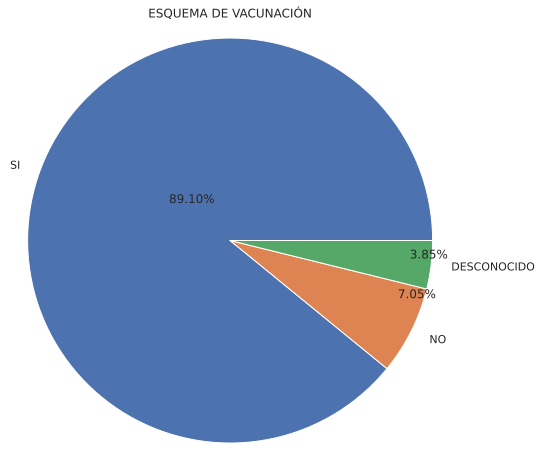

In [89]:
fig1, ax1 = plt.subplots()

ax1.pie(tab2['Menores reportados'], 
        labels=tab2['Asignacion'],
        autopct='%1.2f%%',
        shadow=False,
        )
ax1.axis('equal')
plt.title('ESQUEMA DE VACUNACIÓN')
plt.show()

# Análisis de esquema de vacunación. 

* Se determina que en la población el 89.10% cuenta con esquema de vacunación, el 7.05% no y el 3.85 se desconoce.

In [49]:
Corelacion = pd.crosstab(df_diabetic["edad_"],df_diabetic["sexo_"])
Corelacion

sexo_,F,M
edad_,,
1,207,361
2,145,242
3,122,184
4,114,147
5,27,38
6,33,40
7,26,39
8,24,35
9,24,44


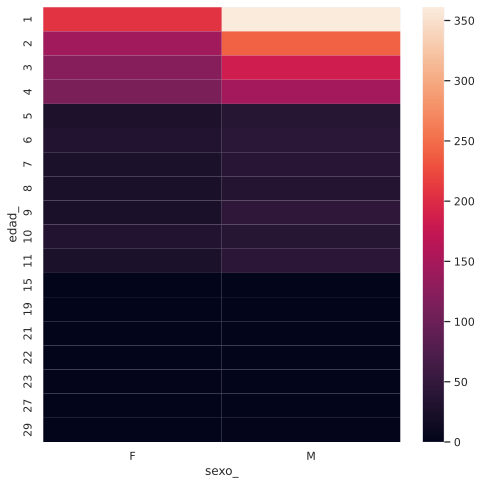

In [46]:
ax = sns.heatmap(Corelacion)

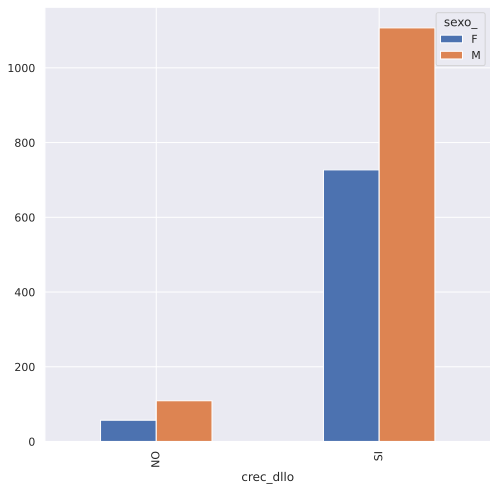

In [93]:
group_sex = df_diabetic.groupby(['sexo_','crec_dllo']).count()['edad_']
(group_sex.unstack(level=0).plot.bar())
plt.show();

#Análisis de crecimiento de desarrollo por sexo.

* En este caso se considera que los niños que cuentan con control de crecimiento de desarrollo son los del sexo masculino por arriba de 1000 casos, en el caso de los que no cuentan con un control de crecimiento son los niños.


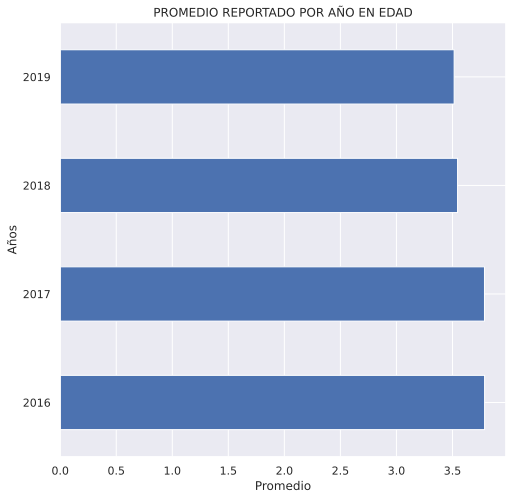

In [73]:
valor_por_ciudad = df_diabetic.groupby("year_")["edad_"].mean()
valor_por_ciudad.head(10).plot.barh()
plt.xlabel(xlabel='Promedio')
plt.ylabel(ylabel='Años')
plt.title(label='PROMEDIO REPORTADO POR AÑO EN EDAD')
plt.show()

#Análisis de reportes en años del promedio de edad en meses.

* Según la grafica anterior el promedio de la edad reportada con caso de desnutrición para el año 2017 fue de más del 3.7 meses, considerado el más alto de los datos reportados.


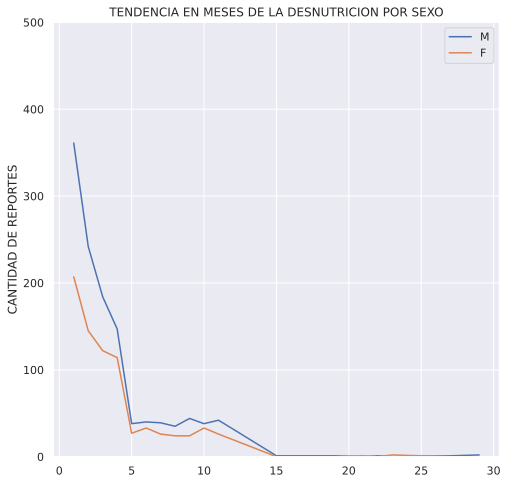

In [87]:
fig,eje= plt.subplots()
for i in ['M','F']:
    eje.plot(Corelacion[i],label=i)
    eje.set_ylim(0,500)
    eje.legend()
    eje.set_ylabel('CANTIDAD DE REPORTES')
    eje.set_title('TENDENCIA EN MESES DE LA DESNUTRICION POR SEXO')

# Análisis de tendencia por sexo y edad.

* Se visualiza que el reporte por desnutrición semanal es mas alto el del sexo masculino, pero a medida que va aumentando la edad en meses este va disminuyendo.
* En el caso del sexo femenino se evidencia reportes altos al igual que el otro sexo a los primeros 5 meses de vida y a medida que pasa el tiempo los casos de desnutrición son más pocos.
